# Importing Libraries for Data Visualization and Manipulation

In [70]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Importing DataSet and viewing its main features 

In [71]:
df = pd.read_csv('C:\\Users\\al aqsa com\\Downloads\\Employee.csv')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [72]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [73]:
df.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

In [74]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [75]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

### Rearanging columns for Better Data preprocessing 

In [76]:
df = df[['Gender','Education', 'City','Age','PaymentTier','JoiningYear','ExperienceInCurrentDomain','LeaveOrNot','EverBenched']]
df

,Gender,Education,City,Age,PaymentTier,JoiningYear,ExperienceInCurrentDomain,LeaveOrNot,EverBenched
0,Male,Bachelors,Bangalore,34,3,2017,0,0,No
1,Female,Bachelors,Pune,28,1,2013,3,1,No
2,Female,Bachelors,New Delhi,38,3,2014,2,0,No
3,Male,Masters,Bangalore,27,3,2016,5,1,No
4,Male,Masters,Pune,24,3,2017,2,1,Yes
...,...,...,...,...,...,...,...,...,...
4648,Female,Bachelors,Bangalore,26,3,2013,4,0,No
4649,Male,Masters,Pune,37,2,2013,2,1,No
4650,Male,Masters,New Delhi,27,3,2018,5,1,No
4651,Male,Bachelors,Bangalore,30,3,2012,2,0,Yes


### Visualizing data for getting to know Features and dependent Variables 

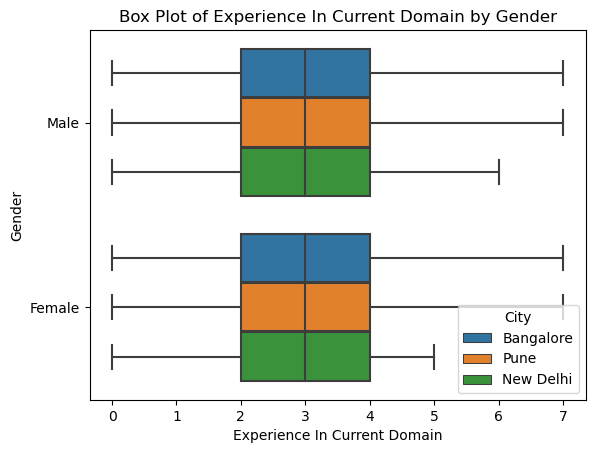

In [77]:
sns.boxplot(data=df, x='ExperienceInCurrentDomain', y='Gender',hue= 'City')

# Customize the plot
plt.xlabel('Experience In Current Domain')
plt.ylabel('Gender')
plt.title('Box Plot of Experience In Current Domain by Gender')
plt.show()

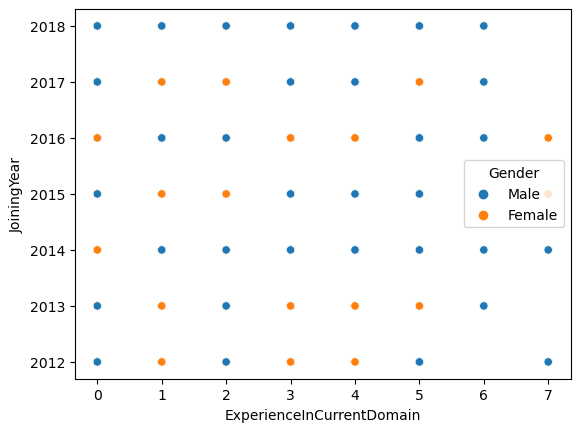

In [80]:
sns.scatterplot(data=df, x='ExperienceInCurrentDomain', y='JoiningYear',hue= 'Gender')
plt.show()

C:\Users\al aqsa com\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


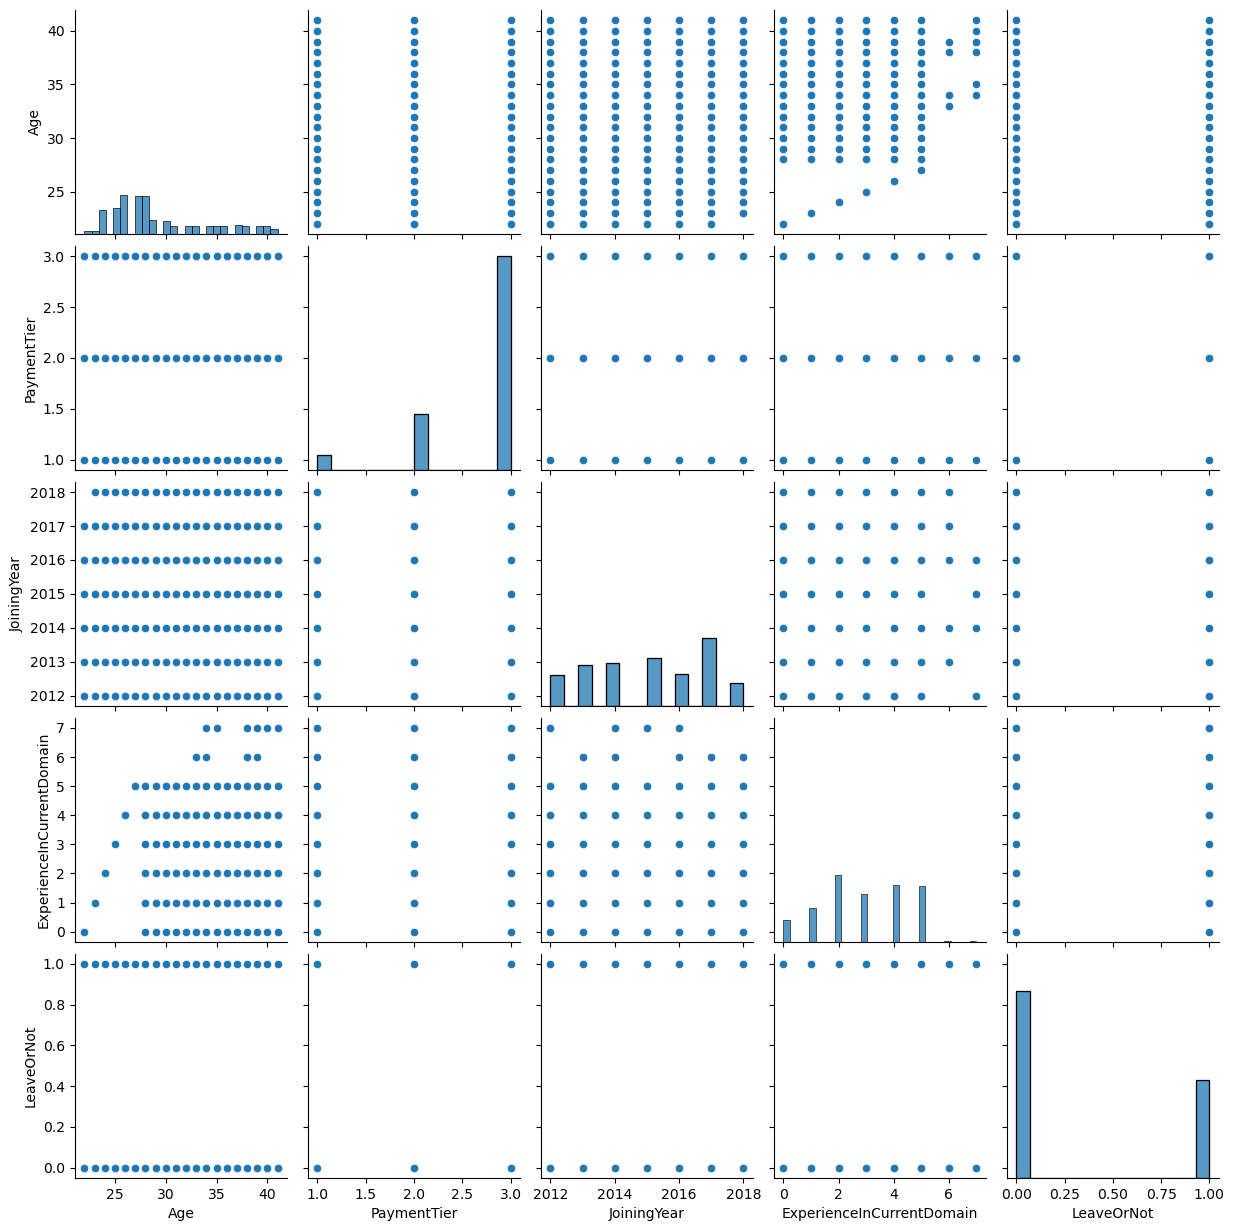

In [83]:
sns.pairplot(data=df)
plt.show()

In [85]:
df.columns

Index(['Gender', 'Education', 'City', 'Age', 'PaymentTier', 'JoiningYear',
       'ExperienceInCurrentDomain', 'LeaveOrNot', 'EverBenched'],
      dtype='object')

# Starting Data preprocessing from here 

## Separating Matrix of features and dependent variables

In [90]:
X = df.iloc[:, 0:8].values
Y = df.iloc[:, -1]

In [112]:
X

array([[1.0, 0.0, 1.0, ..., 2017, 0, 0],
       [0.0, 1.0, 0.0, ..., 2013, 3, 1],
       [0.0, 1.0, 0.0, ..., 2014, 2, 0],
       ...,
       [1.0, 0.0, 1.0, ..., 2018, 5, 1],
       [1.0, 0.0, 1.0, ..., 2012, 2, 0],
       [1.0, 0.0, 1.0, ..., 2015, 4, 0]], dtype=object)

### Using OneHotEncoding converting categorical values into numerical values 

In [110]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer( transformers = [('encoder', OneHotEncoder(),[0])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [111]:
X

array([[1.0, 0.0, 1.0, ..., 2017, 0, 0],
       [0.0, 1.0, 0.0, ..., 2013, 3, 1],
       [0.0, 1.0, 0.0, ..., 2014, 2, 0],
       ...,
       [1.0, 0.0, 1.0, ..., 2018, 5, 1],
       [1.0, 0.0, 1.0, ..., 2012, 2, 0],
       [1.0, 0.0, 1.0, ..., 2015, 4, 0]], dtype=object)

### Converting Dependent values to binary Values using Label Encoding

In [115]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [116]:
Y

array([0, 0, 0, ..., 0, 1, 1])

## Splitting data set into Training and Testing sets 

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [122]:
X_train

array([[0.0, 1.0, 0.0, ..., 2012, 4, 1],
       [1.0, 0.0, 1.0, ..., 2013, 0, 0],
       [1.0, 0.0, 1.0, ..., 2013, 2, 0],
       ...,
       [1.0, 0.0, 1.0, ..., 2017, 1, 1],
       [1.0, 0.0, 1.0, ..., 2018, 6, 1],
       [1.0, 0.0, 1.0, ..., 2015, 2, 0]], dtype=object)

In [123]:
Y_train

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
Y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [125]:
X_test

array([[1.0, 0.0, 1.0, ..., 2017, 4, 0],
       [1.0, 0.0, 1.0, ..., 2012, 2, 0],
       [1.0, 0.0, 1.0, ..., 2012, 5, 0],
       ...,
       [1.0, 0.0, 1.0, ..., 2014, 5, 0],
       [0.0, 1.0, 0.0, ..., 2014, 0, 0],
       [0.0, 1.0, 0.0, ..., 2017, 1, 0]], dtype=object)